# Relação de Servidores Ativos da Prefeitura Municipal de Assú - 2017

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

dataframe_excel = pd.read_excel('RelacaoServidores.xls', sheetname=0, header=0)

In [3]:
dataframe_excel.head()

,Nome,CPF,Cargo,Lotação,Investidura,Salário bruto,Descontos,Salário líquido
0,ABILENE SOARES DA SILVA SOUZA,***.064.284-**,AUXILIAR DE SERVICOS GERAIS,SECRETARIA MUNICIPAL DE GOVERNO,CONCURSADO,1171.25,111.26,1059.99
1,ABILENE SOARES DA SILVA SOUZA,***.064.284-**,AUXILIAR DE SERVICOS GERAIS,SECRETARIA MUNICIPAL DE GOVERNO,CONCURSADO,1171.25,111.26,1059.99
2,ABILENE SOARES DA SILVA SOUZA,***.064.284-**,AUXILIAR DE SERVICOS GERAIS,SECRETARIA MUNICIPAL DE GOVERNO,CONCURSADO,1171.25,142.49,1028.76
3,ABILENE SOARES DA SILVA SOUZA,***.064.284-**,AUXILIAR DE SERVICOS GERAIS,SECRETARIA MUNICIPAL DE GOVERNO,CONCURSADO,1171.25,111.26,1059.99
4,ABILENE SOARES DA SILVA SOUZA,***.064.284-**,AUXILIAR DE SERVICOS GERAIS,SECRETARIA MUNICIPAL DE GOVERNO,CONCURSADO,1171.25,111.26,1059.99


In [4]:
#O comando acima mostra as 5 primeiras linhas da tabela. Existem 13 linhas correspondentes ao pagamento de cada mês, e o 13º salário.
#O comando abaixo mostra um resumo da tabela completa. Não usado por ficar fora de formatação pela quantidade de colunas.

print(dataframe_excel)

                                  Nome             CPF  \
0        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
1        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
2        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
3        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
4        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
5        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
6        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
7        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
8        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
9        ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
10       ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
11       ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
12       ABILENE SOARES DA SILVA SOUZA  ***.064.284-**   
13     ACACIA GARDENIA BARBOSA E SILVA  ***.851.114-**   
14     ACACIA GARDENIA BARBOSA E SILVA  ***.851.114-**   
15     ACACIA GARDENIA BARBOSA E SILVA  ***.851.114-**   
16     ACACIA 

## Perguntas

### Quantos funcionários tiveram aumento de salário? Se sim, qual o tipo de investidura da maioria?

In [29]:
salario_funcionarios = dataframe_excel.Salario_Bruto
aumento_salario = np.diff(salario_funcionarios)
aumento_salario

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

### Houve redução de salário de funcionários? Se sim, qual o cargo da maioria?

In [ ]:
salario_funcionarios = dataframe_excel.Salario_Bruto
reducao_salario = np.diff(salario_funcionarios)
reducao_salario

### Qual sobrenome (família) mais presente entre os cargos?

In [ ]:
nome_funcionarios = dataframe_excel.Nome
separa_nomes = nome_funcionarios.str.split(" ")
i = 0
conta_nomes = []
#while (i < 17716):
#    conta_nomes.append(pd.value_counts(separa_nomes[i]))
#    i = i+1
#conta_nomes

### Quantos e quais funcionários tiveram mudança de cargo?

### Dentre os funcionários com investidura do tipo comissionado, quantos não receberam 13º salário?

### Existe relação entre o tamanho do nome do funcionário e o salário que ele recebe?

In [ ]:
# Esta pergunta foi baseada em uma suposição de que médicos e advogados, ambos com salários elevados, tendem a ter nomes maiores.

In [38]:
nome_funcionarios = dataframe_excel.Nome
tamanho_nome = nome_funcionarios.str.len()

salario_funcionarios = dataframe_excel.Salario_Bruto

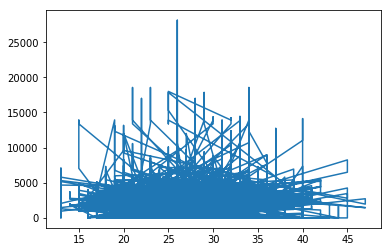

In [41]:
plt.plot(tamanho_nome, salario_funcionarios)
plt.show()

É necessário um outro tipo de gráfico para representar estas informações.

### Qual o tipo de investidura dos funcionários cujo desconto salarial é maior?

In [10]:
# Suspeitasse que pela facilidade em benefícios oferecidos aos concursados pelos bancos, como empréstimos, estes tendem a ter maior desconto em seus respectivos salários.
descontos_concursados = dataframe_excel[dataframe_excel.Investidura == 'CONCURSADO'].Descontos.sort_values()
descontos_comissionados = dataframe_excel[dataframe_excel.Investidura == 'COMISSIONADO'].Descontos.sort_values()
salario_concursados = dataframe_excel[dataframe_excel.Investidura == 'CONCURSADO'].Salario_Bruto.sort_values()
salario_comissionados = dataframe_excel[dataframe_excel.Investidura == 'COMISSIONADO'].Salario_Bruto.sort_values()
descontos_efetivos = dataframe_excel[dataframe_excel.Investidura == 'CONCURSO(EFETIVO)'].Descontos.sort_values()
salario_efetivos = dataframe_excel[dataframe_excel.Investidura == 'CONCURSO(EFETIVO)'].Salario_Bruto.sort_values()

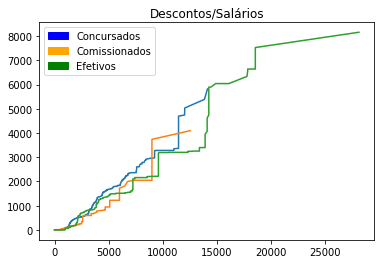

In [13]:
plt.title('Descontos/Salários')
patch_concursados = mpatches.Patch(color = 'blue', label = 'Concursados')
patch_comissionados = mpatches.Patch(color = 'orange', label = 'Comissionados')
patch_efetivos = mpatches.Patch(color = 'green', label = 'Efetivos')
plt.legend(handles=[patch_concursados, patch_comissionados, patch_efetivos])

plt.plot(salario_concursados, descontos_concursados)
plt.plot(salario_comissionados, descontos_comissionados)
plt.plot(salario_efetivos, descontos_efetivos)
plt.show()

##### Existem na base dados o tipo de investidura 'Concursados' e 'Concursados(Efetivos)'. Podem se tratar da mesma informação, mas para evitar uma possível suposição errada pela quantidade de registros de ambos, decidi examinar os 2 separadamente.

### Em qual orgão encontra-se uma maior quantidade de funcionários comissionados?

In [28]:
lotacao_comissionados = pd.value_counts(dataframe_excel[dataframe_excel.Investidura == 'COMISSIONADO'].Lotacao)
lotacao_comissionados

SECRETARIA MUNICIPAL DE SAUDE               450
SECRETARIA MUNICIPAL DE GOVERNO             192
SEC MUN ASSIST SOCIAL, TRAB, CID E HABIT    177
SEC. MUN DE ADMINISTRACAO E PLANEJAMENTO    138
SECRETARIA MUNICIPAL DE OBRAS PUBLICAS       99
EDUCACAO 10%                                 97
PROGRAMA BOLSA FAMILIA                       72
SECRETARIA MUNICIPAL DE FINANCAS             69
SEC MUN DE COMUNICACAO E OUVIDORIA           60
SECRETARIA MUNICIPAL SERVICOS PUBLICOS       54
SEC MUN DE EVENTOS, TUR, ESP E JUVENTUDE     44
SECRETARIA MUNICIPAL DE MEIO AMBIENTE        24
SEC MUN DE DESENV ECON CIEN E TECNOLOGIA     24
SEC MUN DE AGRICULTURA, PECUARIA E PESCA     24
VIGILANCIA EM SAUDE                          13
CONSELHO TUTELAR                             13
PRONTO SOCORRO MUNICIPAL                     12
CENTRO DE ATENCAO PSICOSSOCIAL - C A P S     12
SECRETARIA MUNICIPAL DE TRIBUTACAO           12
PROCURADORIA GERAL DO MUNICIPIO               2
Name: Lotacao, dtype: int64

Percebe-se que na secretaria municipal de saúde estão lotados a maior parte dos funcionários comissionados.

### Quais funcionários foram cedidos para outro órgão?

In [6]:
lotacao_concursados = pd.value_counts(dataframe_excel[dataframe_excel.Investidura == 'CEDIDO PARA OUTRO ORGAO'].Nome)
lotacao_concursados

ROSINEIDE BISPO DO NASCIMENTO                13
SIDNEY COSME PEREIRA                         13
SILVANA DE MELO BEZERRA                      13
FRANCISCA MARIA NUNES SILVA                  13
PEDRO IVO BORGES BIGOIS CAPISTRANO           13
SELEIDE ABREU DA FONSECA PAIVA               13
MARIA ELIZABETE LOURENCO DE ARAUJO SANTOS    13
RODOLFO ALMEIDA PEIXOTO                      13
MARIANA NOBRE DA COSTA                       13
LUCIMEIRE ALMEIDA ADELINO                    13
FRANCISCA MISIA DE OLIVEIRA                  13
DAMIAO RAMALHO                               13
FRANCISCO CANINDE QUIRINO                    13
FERNANDA KALLIANE LOPES ROCHA CESARINO        8
MAX BRENO WANDERLEY                           4
Name: Nome, dtype: int64

Acima, uma lista dos nomes dos funcionários que foram cedidos para outros órgãos.

### Houveram exonerações?

In [25]:
# Caso exista menos de 12 linhas correspondente ao mês de pagamento, deduz-se que o funcionário foi exonerado.

Alguns funcionários não possuem as 13 ou 12 linhas por não terem tomado posse ou não foram contratados no início do ano, tornando esta forma de descobrir este tipo de informação inválida.